### Problem Statement
You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

### Import the important packages

In [407]:
# For Calculations and data manipulation
import pandas as pd
import numpy as np
# For Visualisation
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import plotly.express as px
import seaborn as sns
%matplotlib inline
# For data pre processing
from scipy.stats import zscore
import scipy.stats as stats
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC

# For Metric and Classification
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,roc_auc_score,roc_curve
from statistics import mean,stdev

# For Validating of Models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score,cross_validate
from sklearn.base import TransformerMixin, BaseEstimator

#Others
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format



#### 1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

In [408]:
#Read The Data Dictonary
df_datadict=pd.read_excel("Election_Data.xlsx")
df_datadict.dropna()

,**Data Dictionary**
1,1. vote: Party choice: Conservative or Labour
3,2. age: in years
5,3. economic.cond.national: Assessment of curre...
7,4. economic.cond.household: Assessment of curr...
9,"5. Blair: Assessment of the Labour leader, 1 t..."
11,6. Hague: Assessment of the Conservative leade...
13,7. Europe: an 11-point scale that measures res...
15,8. political.knowledge: Knowledge of parties' ...
17,9. gender: female or male.


In [602]:
# Read the Dataset
df=pd.read_excel("Election_Data.xlsx",sheet_name=1)

In [410]:
# Checking the loaded Dataset by Top 5 values
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [603]:
# Dropping the Unnamed columns from data
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [604]:
# Checking the information of loaded Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [413]:
#Checking the Data Types of variables
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

Insights:\
1.There is total 1525 entries in dataset with 9 variables.\
2.The data has only 2 object category like Vote and Gender.\
3.Seems there is NO missing values in data set.\
4.One variable 'Unnamed'is found which may be indication of Serial Number.

### Exploratory Data Analysis

In [605]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [606]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (1525, 9)
After (1517, 9)


In [416]:
# Checking the NULL Values
print("Missing Values in data is:\n",df.isnull().sum())

Missing Values in data is:
 vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64


NO missing value is detected in data set

In [417]:
# determine actual categorical features 
df.nunique()

vote                        2
age                        70
economic.cond.national      5
economic.cond.household     5
Blair                       5
Hague                       5
Europe                     11
political.knowledge         4
gender                      2
dtype: int64

Age has 70 number of entries which denotes good numbers.

In [418]:
# Five fold statistical Summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.00,54.24,15.70,24.00,41.00,53.00,67.00,93.00
economic.cond.national,1517.00,3.25,0.88,1.00,3.00,3.00,4.00,5.00
economic.cond.household,1517.00,3.14,0.93,1.00,3.00,3.00,4.00,5.00
Blair,1517.00,3.34,1.17,1.00,2.00,4.00,4.00,5.00
Hague,1517.00,2.75,1.23,1.00,2.00,2.00,4.00,5.00
Europe,1517.00,6.74,3.30,1.00,4.00,6.00,10.00,11.00
political.knowledge,1517.00,1.54,1.08,0.00,0.00,2.00,2.00,3.00


Insights: \
1.The Mean and median are close to each other so it can be presumed that data has symmetry in distribution to large extent.\
2.Possibility of Outliers in Age can be observed because the maximum value is 93.Which cannot be ruled out for age purpose.\
3.Details of outlier can be detected during its dedicated operation.\
4.Standard deviation is almost close to 1 in most of the cases like Economic condtions national and househols,Blair,Hague, Political knowledge.\
5.While its differing in case of age and Europe.


### Checking skewness of data
Skewness is degree of asymmetry observed in a  in a statistical distribution, in which the curve appears distorted \
or skewed either to the left or to the right. \
Skewness can be quantified to define the extent to which a distribution differs from a normal distribution.\
In this statatical distribution. Distributions can exhibit right(positive) skewnessor \
left (negative) skewness to varying degrees.\
While Normal distribution (bell curve) exhibits zero skewness.\
Skewness is computed for each row or each column of the data present in the DataFrame object.

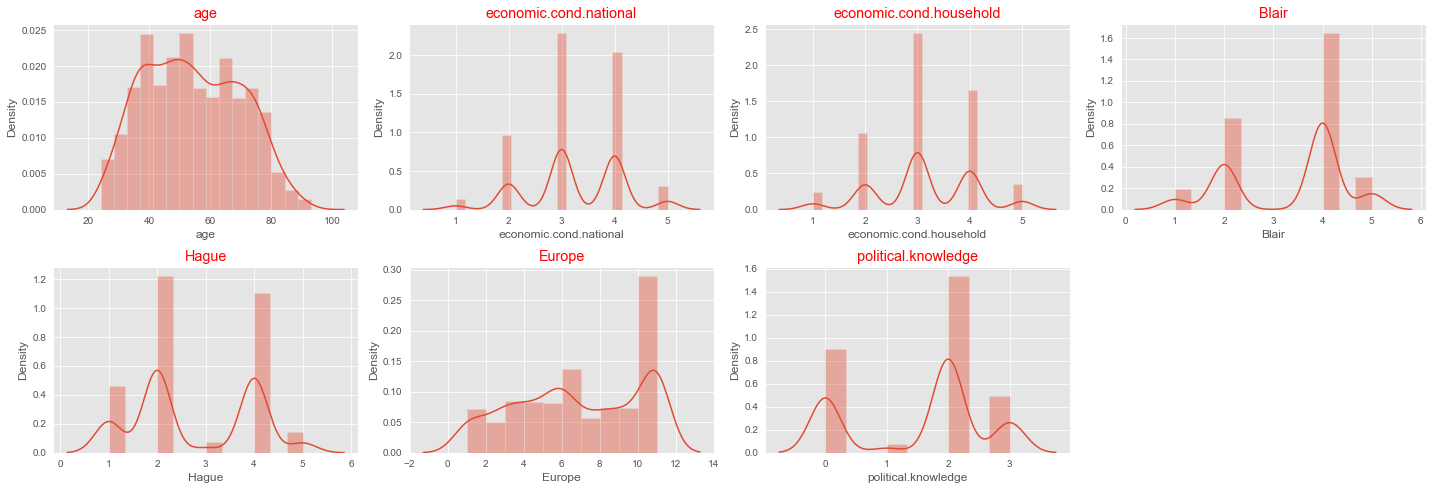

In [419]:
#Data Distribution of each variable
dfnum=df.select_dtypes(["int64","float64"])
data_plot=dfnum
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(6,4,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],hist=True)
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()
plt.show() 

In [420]:
skew=df.skew()
skew

age                        0.14
economic.cond.national    -0.24
economic.cond.household   -0.14
Blair                     -0.54
Hague                      0.15
Europe                    -0.14
political.knowledge       -0.42
dtype: float64

Insights:\
1.In most of cases the skewness is between -0.5 and 0.5, We can say thatthe data are fairly symmetrical.\
2.Age is almost normally distributed.
3.Only in case of 'Vote' skewness is between -1 and — 0.5 in this case the data can be treated as moderately skewed\
4.A negative skewness value in the output indicates an asymmetry in the distribution corresponding to row and the tail is larger towards the left hand side of the distribution.
Determination by Box Plot:\
We can determine whether or not a distribution is skewed based on the location of the median value in the box plot/
In our case the median is in the middle (with sliglt movament towards negative side) of the box and the whiskers are roughly equal on each side, the distribution is symmetrical (or “no” skew)..(Fig showing in Outlier detection)

#### 1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [421]:
# Checking the NULL Values
print("Missing Values in data is:\n",df.isnull().sum())

Missing Values in data is:
 vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64


In [422]:
# Checking Datatypes again as per requirement
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [423]:
# Checking the shape of data
df.shape

(1517, 9)

#### Univariate Analysis


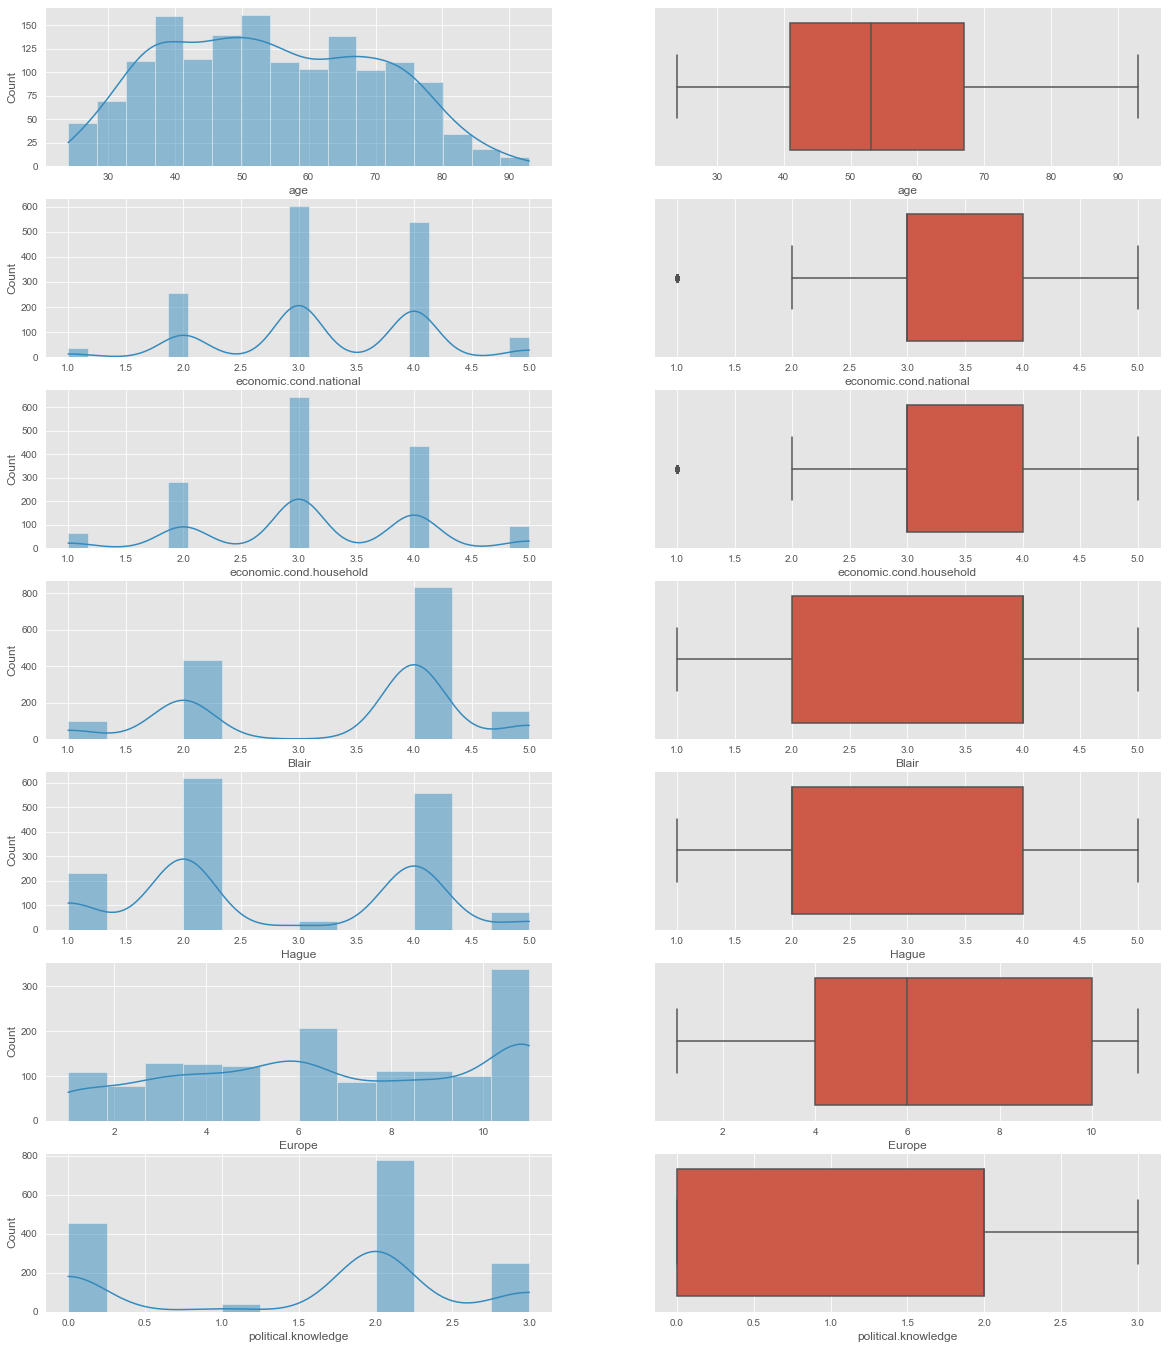

In [424]:
# Univariate Analysis of  numerical data
df_num=df.select_dtypes(["int64","float64"])
fig, ax= plt.subplots(7,2, figsize=(20,24))
i=0
j=0
for col in df_num.columns:
    sns.histplot(x=df_num[col], ax=ax[i][j], kde=True)
    sns.boxplot(x=df_num[col], ax=ax[i][j+1])
    i=i+1


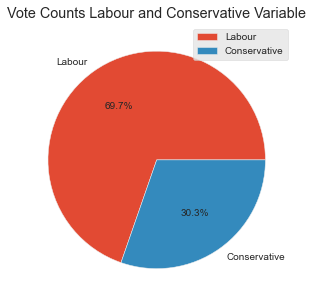

In [607]:
#Value Counts of Categorical variable-Vote
plt.figure(figsize=(5,5))

plt.pie(df["vote"].value_counts(),labels=df["vote"].value_counts().index,autopct='%1.1f%%')
plt.legend()
plt.title('Vote Counts Labour and Conservative Variable')
plt.grid()
plt.show()

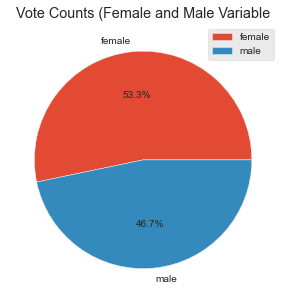

In [608]:
#Value Counts of Categorical variable-Gender 
plt.figure(figsize=(5,5))

plt.pie(df["gender"].value_counts(),labels=df["gender"].value_counts().index,autopct='%1.1f%%')
plt.legend()
plt.title('Vote Counts (Female and Male Variable')
plt.grid()
plt.show()

Insight:\
1.In two variables like "economic.cond.national" and "economic.cond.household" both has showing that the mid-level economic conditions population are more than others.\
2.Wide range of age groups\
3.High assessment of for labor leader because bar is highest for 4 on scale of 800.\
4.Assestment for Conservative leaders are comparative low in score because of bar no 2 has highest elevation and less for no 4 in scale of 600.\
5.Highest number of people are are Eurosceptic because its percentage is more than double of remaining population.\
6.Political knowledge of parties position in Europe integration are fairly high as bar 2 has highest elevation on scale of 800.of scale of rating 0-3.\
7.Females are more in number than of males.\
8.As per visualization the labor party has more than 50% better choice than of conservative.\
9.The Labor party is choice of almost 70% voters while 30% for conservative.\
10.The female population are 7% more over the male population.


#### Bivariate Analysis

Bivariate analysis is stated to be an analysis of any concurrent relation between two variables or attributes. This study explores the relationship of two variables as well as the depth of this relationship to figure out if there are any discrepancies between two variables and any causes of this difference

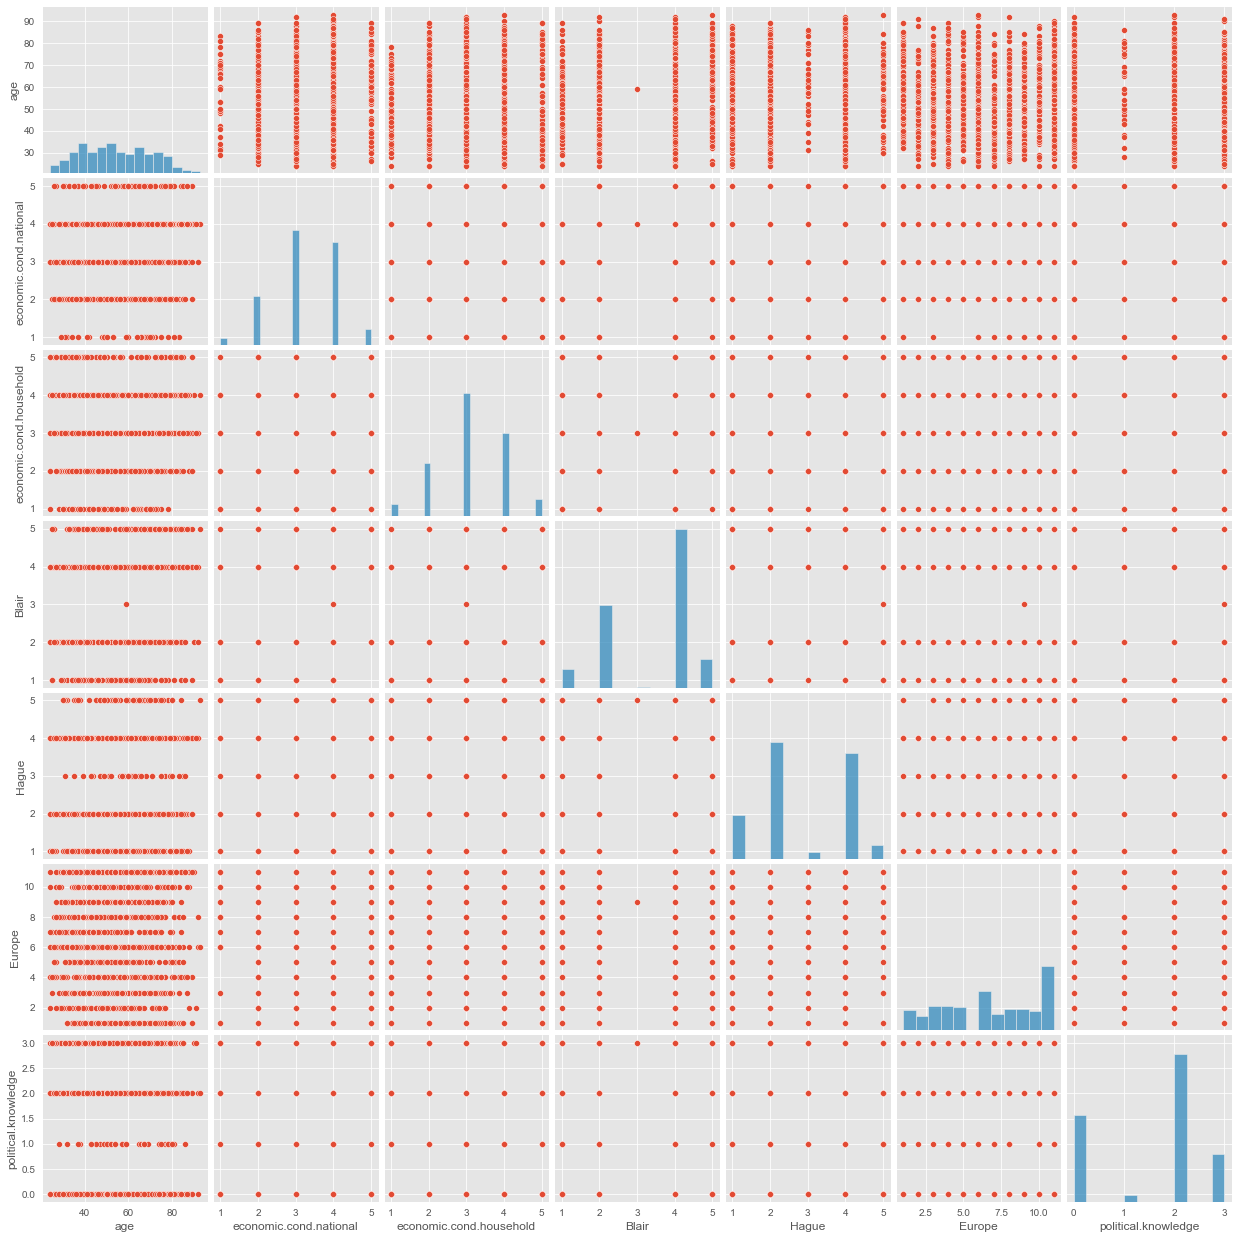

In [427]:
# Bivariate Analysis
sns.pairplot(df)

In the above plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns

#### Checking with target variabel(Vote) with other

In [609]:
df.groupby("vote").mean()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
vote,,,,,,,
Conservative,56.84,2.84,2.89,2.58,3.62,8.66,1.72
Labour,53.11,3.42,3.25,3.67,2.37,5.90,1.46


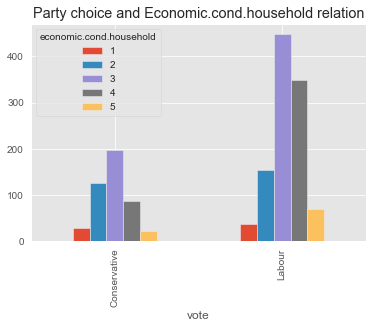

In [615]:
pd.crosstab(df['vote'], df['economic.cond.household']).plot(kind='bar', title = 'Party choice and Economic.cond.household relation');

All economic condition of Household has orientation towards Labour party.

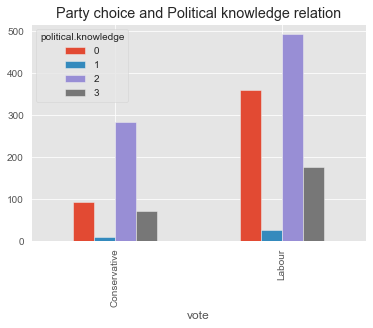

In [610]:
pd.crosstab(df['vote'], df['political.knowledge']).plot(kind='bar', title = 'Party choice and Political knowledge relation');

Insight:
Labour party has edge with class 2 voters nearly 500 followed by class 0 aprox 380 and class 3 almost 180.While class 1 has low voter both the parties.

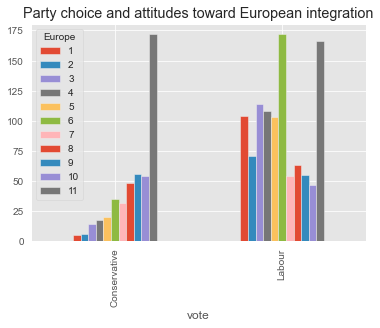

In [611]:
pd.crosstab(df['vote'], df['Europe']).plot(kind='bar', title = 'Party choice and attitudes toward European integration');

Insights:
Labour party has high impact in almost all class except 11 where attitudes toward European integration having very little margin. 

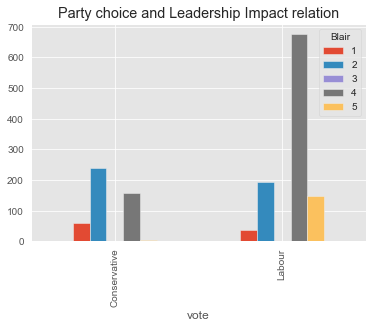

In [612]:
pd.crosstab(df['vote'], df['Blair']).plot(kind='bar', title = 'Party choice and Leadership Impact relation');

insight: Labour party leader has high impact among almost 700 with rating of 4

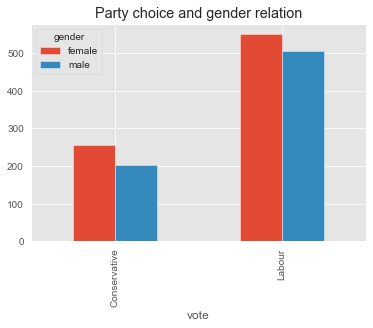

In [613]:
pd.crosstab(df['vote'], df['gender']).plot(kind='bar', title = 'Party choice and gender relation');

insight: Both male and female has oriented towards the labour party with large margin.

#### Multivariate Analysis
Multivariate analysis encompasses all statistical techniques that are used to analyze more than two variables at once. The aim is to find patterns and correlations between several variables simultaneously—allowing for a much deeper, more complex understanding of a given scenario than you’ll get with bivariate analysis.

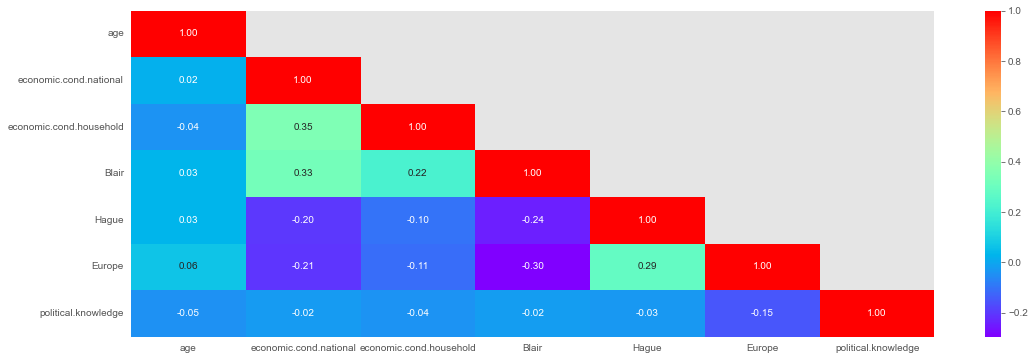

In [433]:
# Multivariate Analysis
corr=df.corr()
plt.figure(figsize=(18,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.iloc[:,0:9].corr(),+1))
plt.show()

In [434]:
# Let us see the significant correlation either negative or positive among independent attributes..
c = df.corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) & (so>0.3)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

correlation
economic.cond.national economic.cond.household         0.35
                       Blair                           0.33

NO any correlation are visible all variables are under 50% of correlation.

#### Outlier Detecttion and its treatment

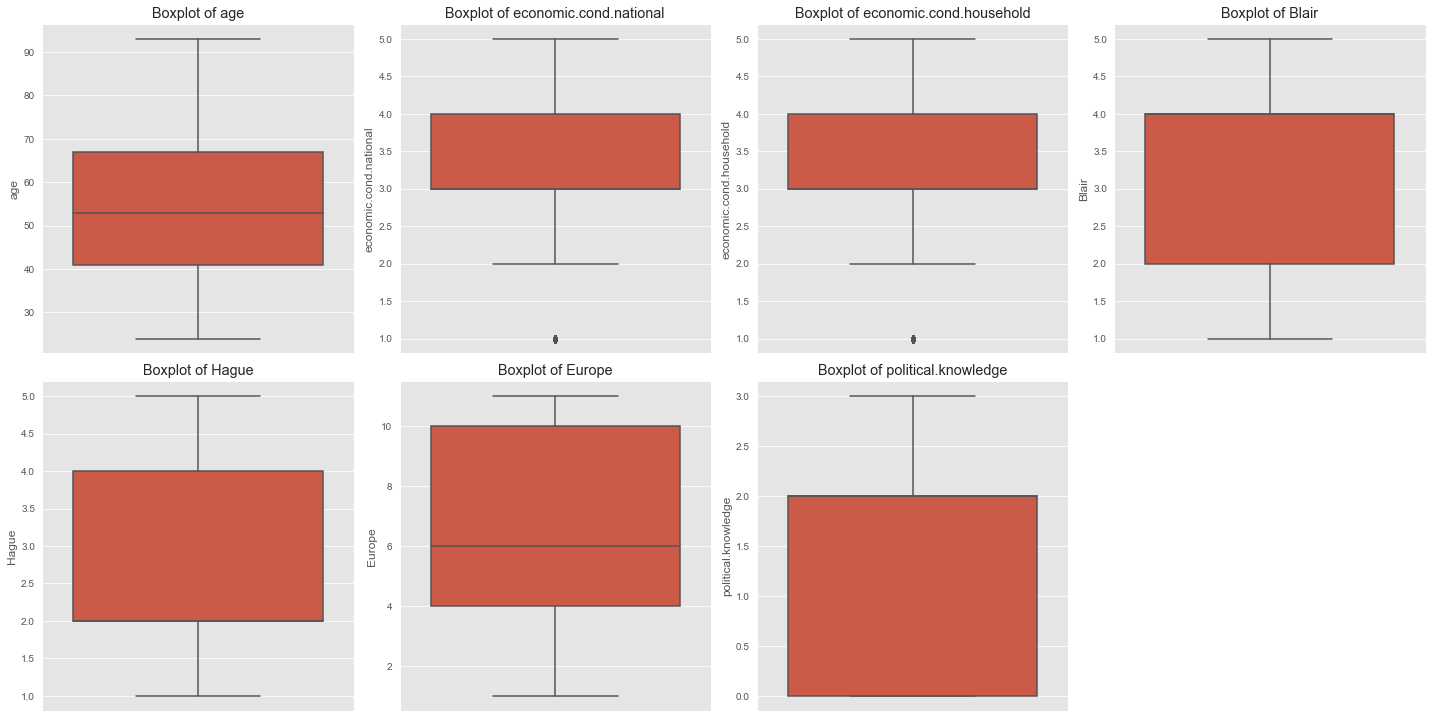

In [435]:
# Outlier Detection
df_num=df.select_dtypes(["int64","float64"])
plt.figure(figsize = (20,20))
feature_list = df_num.columns[:]
for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

Insights:\
1.Only Two has one point each as outlier can be detected in Boxplot but it seems some error because the both the variables are on 1-5 scale. and No point beyond this is dataset.\
2.All the variables are are on the close mean position.\
 Economic condition nation and household the variable has Ordinal variable, hence there is NO NEED of TREATMENT of Outliers.\
3.Economic condition nation and household has same mean.\
4.In Europe the 3rd Quartile has large number of datapoints than others quartile with maens 0f 6.\
5..Ploitical knowledge has all data point fall in Quartile 1 and 2.\
6.Both the variable has Ordinal variable so the outliers not to remove for further processing.

#### 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

#### Encoding of Categorical Columns

#### One Hot encoding for Categorical data
The Two variables are present as "Object"(Gender) as original form but for further processing these has to encoding. So, we chose for One Hot encoding. Both has two categories so by this method the columns of dataset will remain same after drop first. While for target variable will go for manual encoding.\
One-Hot-Encoding is used to create dummy variables to replace the categories in a categorical variable into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical value in the record.\
This is required to do since the machine learning algorithms only works on the numerical data. That is why there is a need to convert the categorical column into numerical one.\
get dummies is the method which creates dummy variable for each categorical variable.\
It is considered a good practice to set parameter drop first as True whenever get dummies is used. It reduces the chances of multicollinearity which will be covered in coming courses and the number of features are also less as compared to drop first=False\
nearity which will be covered in coming courses and the number of features are also less as compared to drop_first=False

In [620]:
# One Hot encoding for Gender and Vote which qualify for it drop_first=True will drop one of the two 
df = pd.get_dummies(df,columns=["gender"],drop_first=True)
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,Labour,43,3,3,4,1,2,2,0
1,Labour,36,4,4,4,4,5,2,1
2,Labour,35,4,4,5,2,3,2,1
3,Labour,24,4,2,2,1,4,0,0
4,Labour,41,2,2,1,1,6,2,1


##### Encoding of Target Variable "Vote"(Party choice) as per instruction

In [437]:
df.vote = pd.Categorical(df.vote).codes

In [438]:
df["vote"].value_counts()

1    1057
0     460
Name: vote, dtype: int64

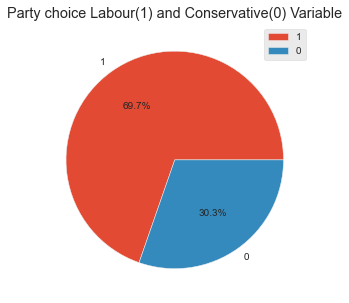

In [439]:
#Value Counts of Categorical variable-Vote
plt.figure(figsize=(5,5))

plt.pie(df["vote"].value_counts(),labels=df["vote"].value_counts().index,autopct='%1.1f%%')
plt.legend()
plt.title('Party choice Labour(1) and Conservative(0) Variable')
plt.grid()
plt.show()

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int8 
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender_male              1517 non-null   uint8
dtypes: int64(7), int8(1), uint8(1)
memory usage: 130.1 KB


### Scaling of data

###### NO SCALING is required becasue(except KNN)
Often the variables of the data set are of different scales i.e. one variable is in millions and other in only 100. For e.g. in our data set Age is having values with in and  100 and other variables too are with in range of 100. Since the data in these variables are of same scales, it is easy to compare these variables without scaling.\
Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

A standard deviation is the positive square root of the arithmetic mean of the squares of the deviations of the given values from their arithmetic mean. It is denoted by a Greek letter sigma, σ. It is also referred to as root mean square deviation.\
Standard deviation is almost close to 1 in most of the cases like Economic condtions national and househols,Blair,Hague, Political knowledge,While its differing in case of age and Europe

The square of the standard deviation is the variance. It is also a measure of dispersion.


### Model Building

- Split Data as Train and Test set
- Logistic Regression Classifier, Evaluate Model Performance and Predict Test Data
- Linear Discriminant Ananlysis Classifier and Evaluate Model Performance and Predict Test Data 
-Naïve Bayes Model classifier Analysis Evaluate Model Performance and Predict Test Data
-KNN Model Evaluate Model Performance and Predict Test Data

#### Extracting the target column into separate vectors for training set and test set

In [441]:
#Extracting the target column into separate vectors for training set and test set
X = df.drop("vote", axis=1)

y = df.pop("vote")

X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


#### Data Split: Spliting the data into training and test in ratio of 70:30
Discussion:\
1.The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.
2.The train_test_split() method is used to split our data into train and test sets.Samples from the original training dataset are split into the two subsets using random selection. This is to ensure that the train and test datasets are representative of the original dataset.\
    Procedure: First, we need to divide our data into features (X) and labels (y). The dataframe gets divided into X_train,X_test , y_train and y_test. X_train and y_train sets are used for training and fitting the model. The X_test and y_test sets are used for testing the model if it’s predicting the right outputs/labels. we can explicitly test the size of the train and test sets.\
3.The procedure has one main configuration parameter, which is the size of the train and test sets. This is most commonly expressed as a percentage between 0 and 1 for either the train or test datasets,we keep our train sets larger than the test sets.\
4.There is no optimal split percentage on train and test but 75:25 and 70:30 are most common in analysis.\
5.The objective is to estimate the performance of the machine learning model on new data: data not used to train the model
6.This is done to ensure that datasets are a representative sample (e.g. random sample) of the original dataset, which in turn, should be a representative sample of observations from the problem domain\
7.Stratified Train-Test Splits: Some classification problems do not have a balanced number of examples for each class label. As such, it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.




In [442]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=.30, random_state=1)

In [443]:
#checking of Diamention of data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total Obs',1061+456)

X_train (1061, 8)
X_test (456, 8)
y_train (1061,)
y_test (456,)
Total Obs 1517


##### 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

### Model 1: Logistic Regression
Logistic regression is statistical method to make predictions on binary classes, the target/outcome variable of these models can only have two possible classes. In examples where the tarhet variable is of categorical nature, the model uses a log of odds as the dependent variable. Logistic regression there after compute the probability of an event occurrences.
For this project we can add in the OneVsRestClassifer described in the beginning of this chapter to make our multiclass problem binary in order to fit to a logistics regression model.


###### Logical reason behind the selection of different values for the parameters involved in each model.
That we use parameter C as our regularization parameter. Parameter C = 1/λ. Lambda (λ) controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple. For example, if λ is very low or 0, the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. If, in the other hand, we increase the value of λ, the model will tend to underfit, as the model will become too simple. Parameter C will work the other way around. For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which implies the model is allowed to increase it's complexity, and therefore, overfit the data.

In [444]:
#Formulation of LOGISTIC REGRESSION model on the train data.
lr=LogisticRegression(random_state = 0)

In [445]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [446]:
y_predict=lr.predict(X_test)
y_train_pred = lr.predict(X_train)

In [447]:
# Deriving Accuracy Score,Classification report confusion Matrix & Statndard Deviation of Training data
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.2f}\n'.format(accuracy_score(y_train,lr.predict(X_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,lr.predict(X_train))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,lr.predict(X_train))))
res = cross_val_score(lr, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061


Confusion Matrix:
[[200 107]
 [ 68 686]]

Average Accuracy:	0.8313

Standard Deviation:	0.0264


In [448]:
# Deriving Accuracy Score,Classification report & confusion Matrix 
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,lr.predict(X_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,lr.predict(X_test))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,lr.predict(X_test))))

TEST RESULTS:

Accuracy Score: 0.8246

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456


Confusion Matrix:
[[110  43]
 [ 37 266]]



AUC for the Training Data: 0.890
AUC for the Test Data: 0.879


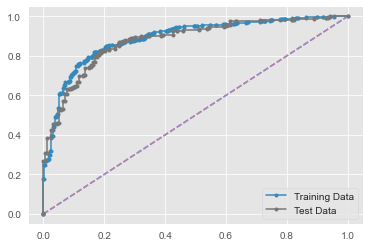

In [450]:
#AUC and ROC for the training data of Logistic Regression
pred_prob_train1 = lr.predict_proba(X_train)
pred_prob_test1 = lr.predict_proba(X_test)
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train1[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test1[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [529]:
#Getting model score on train and Test data model LR
print('Accuracy of logistic regression classifier on train set: {:.2f}'
      .format(lr.score(X_train,y_train)))

print('Accuracy of logistic regression classifier on test set: {:.2f}'
      .format(lr.score(X_test,y_test)))

Accuracy of logistic regression classifier on train set: 0.84
Accuracy of logistic regression classifier on test set: 0.82


###### Validness of Model - Logistic Regression:
1.The Train and test results are very close to each other with difference of less tha 2% ,\
this can be considered as good case of classification.\
2.The accuracy score is also pretty good at 84% and 82% on test data.\
3.The variation in precision are minimum while there is slight variation in Recall and F1 score but seems consistant for both train and test set.\
4.In AUC score for both train(89%) and test data(87%) are close to each other also. \
5.In confusion matrix the the True positives are 54% and True Negatives are 24% whereas 8% are predict as positive and 9% are predict as Negative which is not in actual.\
6.Hence there is No case of over fitting or Under fitting of data.\
7.The model would be stable and will perform good. \
8.As per this model can predict with 82% of accuracy that Labour party will get the edge over conservatives.

### Model 2 Linear Discriminant Analysis
Linear Discriminant Analysis (LDA) algorithm for classification predictive modeling problems
LDA makes predictions by estimating the probability that a new set of inputs belongs to each class. The class that gets the highest probability is the output class and a prediction is made.

The model uses Bayes Theorem to estimate the probabilities. Briefly Bayes’ Theorem can be used to estimate the probability of the output class (k) given the input (x) using the probability of each class and the probability of the data belonging to each class:

P(Y=x|X=x) = (PIk * fk(x)) / sum(PIl * fl(x))

Where PIk refers to the base probability of each class (k) observed in your training data (e.g. 0.5 for a 50-50 split in a two class problem). In Bayes’ Theorem this is called the prior probability.

PIk = nk/n

The f(x) above is the estimated probability of x belonging to the class. A Gaussian distribution function is used for f(x). Plugging the Gaussian into the above equation and simplifying we end up with the equation below. This is called a discriminate function and the class is calculated as having the largest value will be the output classification (y):

Dk(x) = x * (muk/siga^2) – (muk^2/(2*sigma^2)) + ln(PIk)

Dk(x) is the discriminate function for class k given input x, the muk, sigma^2 and PIk are all estimated from data.

When we have meaningfully labelled data, Applying LDA to a dataset will tell us how linearly separable our dataset is (which, depending on the context, may also be a commentary on howmeaningful our labels are). That, in turn, is a good marker of how hard we will have to work to generate a model with reasonable classification performace. Furthermore, by looking at what variables load highly, we can determine what elements of the dataset are the strongest signals for each of our classes

In [524]:
lda=LinearDiscriminantAnalysis()

In [525]:
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [526]:
y_predict=lda.predict(X_test)
y_train_pred = lda.predict(X_train)

In [530]:
# Deriving Accuracy Score,Classification report confusion Matrix & Statndard Deviation of Training data
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,lda.predict(X_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,lda.predict(X_train))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,lda.predict(X_train))))
res = cross_val_score(lda, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 0.8341

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061


Confusion Matrix:
[[200 107]
 [ 69 685]]

Average Accuracy:	0.8257

Standard Deviation:	0.0282


In [531]:
# Deriving Accuracy Score,Classification report & confusion Matrix 
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,lda.predict(X_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,lda.predict(X_test))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,lda.predict(X_test))))

TEST RESULTS:

Accuracy Score: 0.8333

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456


Confusion Matrix:
[[111  42]
 [ 34 269]]



In [528]:
#confusion Matrix & Classification report on train data
lda_score = lda.score(X_train, y_train)
print('Accuracy of Linear Discriminant Analysis (LDA) Classifier on train set:{:.2f}'.format(lda.score(X_train, y_train)))
print('Accuracy of Linear Discriminant Analysis (LDA) Classifier on test  set:{:.2f}'.format(lda.score(X_test, y_test)))


Accuracy of Linear Discriminant Analysis (LDA) Classifier on train set:0.83
Accuracy of Linear Discriminant Analysis (LDA) Classifier on test  set:0.83


In [459]:
# Getting accurecy and summary of on different cuts in LDA
pred_prob_train1 = lda.predict_proba(X_train)
pred={}
for cut in [0.35,0.4,0.45,.50,.55,.60]:
    pred_train1=[]
    for i in pred_prob_train1[:,1]:
        if i > cut:
            pred_train1.append(1)
        else:
            pred_train1.append(0)
    pred[cut]= pred_train1  

In [460]:
for cut in [0.35,0.4,0.45,.50,.55,.60]:
    print('Classification Report of the training data for cutoff of ', cut, ':\n\n',metrics.classification_report(y_train,pred[cut]),'\n')
#len(pred[0.5])

Classification Report of the training data for cutoff of  0.35 :

               precision    recall  f1-score   support

           0       0.80      0.53      0.64       307
           1       0.83      0.95      0.88       754

    accuracy                           0.82      1061
   macro avg       0.81      0.74      0.76      1061
weighted avg       0.82      0.82      0.81      1061
 

Classification Report of the training data for cutoff of  0.4 :

               precision    recall  f1-score   support

           0       0.80      0.57      0.67       307
           1       0.84      0.94      0.89       754

    accuracy                           0.83      1061
   macro avg       0.82      0.76      0.78      1061
weighted avg       0.83      0.83      0.82      1061
 

Classification Report of the training data for cutoff of  0.45 :

               precision    recall  f1-score   support

           0       0.76      0.62      0.68       307
           1       0.85      0.92

AUC for the Training Data: 0.889
AUC for the Test Data: 0.888


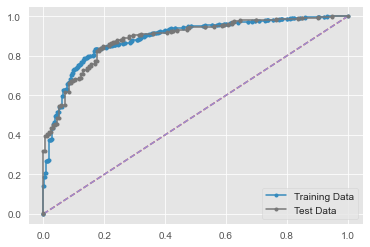

In [461]:
#AUC and ROC for the training data of Linear Discriminant Analysis
pred_prob_train1 = lda.predict_proba(X_train)
pred_prob_test1 = lda.predict_proba(X_test)
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train1[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test1[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [633]:
#Getting model score on train and Test data model LR
print('Accuracy of Linear Discriminant Analysis classifier on train set: {:.2f}'
      .format(lda.score(X_train,y_train)))

print('Accuracy of Linear Discriminant Analysis classifier on test set: {:.2f}'
      .format(lda.score(X_test,y_test)))

Accuracy of Linear Discriminant Analysis classifier on train set: 0.83
Accuracy of Linear Discriminant Analysis classifier on test set: 0.83


##### Validness of Model - LDA:

1.The accuracy score is also pretty good at 83% for train and test both.\
2.The variation in precision and slight variation in Recall and F1 score but seems consistant for both train and test set. 4.In AUC score is almost 89% for both train and test data.\
3.In confusion matrix classification ,True positives are 60 % and True Negatives are 23% whereas 8% are predict as positive and 4.14% are poredict as Negative which is not in actual.\
5.Hence there is No case of over fitting or Under fitting of data.\
6.The model would be stable and will perform good.\
7.As per this model the Labour party will get the edge over conservatives.\
8.This model would be also stable and good for prediction.

#####  1.5)Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

### Model 3: Performing KNN Model

For naive bayes algorithm while calculating likelihoods of numerical features it assumes the feature to be normally distributed and then we calculate probability using mean and variance of that feature only and also it assumes that all the predictors are independent to each other. Scale doesn’t matter. Performing a features scaling in this algorithms may not have much effect.

To tackle the high variance of the Hold-out method, the k-fold method is used. The idea is simple, divide the whole dataset into ‘k’ sets preferably of equal sizes. Then the first set is selected as the test set and the rest ‘k-1’ sets are used to train the data. Error is calculated for this particular dataset. Then the steps are repeated, i.e. the second set is selected as the test data, and the remaining ‘k-1’ sets are used as the training data. Again, the error is calculated. Similarly, the process continues for ‘k’ times. In the end, the CV error is given as the mean of the total errors calculated individually.


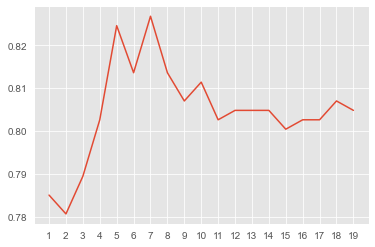

In [462]:
# Choose K
a_index=list(range(1,20))
a=pd.Series(dtype='float64')
x=[1,2,3,4,5,6,7,8,9,10, 11, 12, 13, 14,15,16,17,18,19]
for i in list(range(1,20)):
    knn=KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train,y_train.ravel())
    knnprediction=knn.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(knnprediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x);

The highest point accuracy at 7 so the Neighbor would be is 7.

In [463]:
# Choosing the best K by error method
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

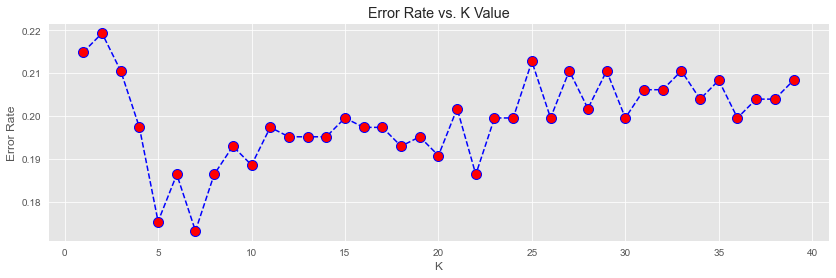

In [464]:
plt.figure(figsize=(14,4))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

The Lowest Error rate at 7 so the Neighbor would be is 7.

In [465]:
knn = KNeighborsClassifier(n_neighbors=7,weights='distance',algorithm='brute',metric = 'minkowski')

In [466]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=7, weights='distance')

In [467]:
y_predict=knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [578]:
# Deriving Accuracy Score,Classification report confusion Matrix & Statndard Deviation of Training data
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,knn.predict(X_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,knn.predict(X_train))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,knn.predict(X_train))))
res = cross_val_score(knn, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061


Confusion Matrix:
[[307   0]
 [  0 754]]

Average Accuracy:	0.8059

Standard Deviation:	0.0348


In [579]:
# Deriving Accuracy Score,Classification report & confusion Matrix on Test data
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.2f}\n'.format(accuracy_score(y_test,knn.predict(X_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,knn.predict(X_test))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,knn.predict(X_test))))

TEST RESULTS:

Accuracy Score: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       153
           1       0.84      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.81      0.82      0.81       456


Confusion Matrix:
[[ 99  54]
 [ 29 274]]



AUC for the Training Data: 1.000
AUC for the Test Data: 0.868


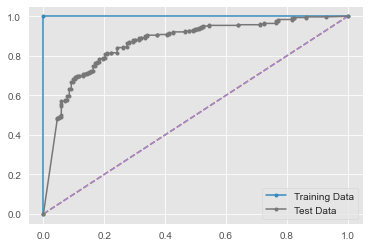

In [471]:
#AUC and ROC for the training data of KNN
pred_prob_train1 = knn.predict_proba(X_train)
pred_prob_test1 = knn.predict_proba(X_test)
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train1[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test1[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [472]:
#Getting model score on train and Test data
knn_score = knn.score(X_train, y_train)
print('Accuracy of KNeighbors Classifier on train set:{:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test  set:{:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on train set:1.00
Accuracy of KNeighbors Classifier on test  set:0.82


##### Validness of Model - KNN:
1.The Train and test results are very far to each other with difference of more than 17%, \
this cannot be considered as good for classification classification. \
2.Large variation in all parameters of scores.
3.Although The  model accuracy score is also pretty good at 82% on test and 100% on train.\
3.Hence the case can be considered as case of OVER fitting .\
4.It would be advisable to DROP this model although the Scaling is not done .

###  Model 4: Performing Naïve Bayes Model 
Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.\
Naïve Bayes Classifier is a probabilistic classifier and is based on Bayes Theorem.\
It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.\
Principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable.
Bayes theorem gives us the probability of Event A to happen given that event B has occurred.

###### Improvement of Model Accuracy Logic
Total number of fits is 1000 since the cv is defined as 10 and there are 100 candidates (var_smoothing has 100 defined parameters). Therefore, the calculation for a total number of fits → 10 x [100] = 1000.

estimator is the machine learning model of interest, provided the model has a scoring function; in this case, the model assigned is GaussianNB().
param_grid is a dictionary with parameters names (string) as keys and lists of parameter settings to try as values; this enables searching over any sequence of parameter settings.
verbose is the verbosity: the higher, the more messages; in this case, it is set to 1.
cv is the cross-validation generator or an iterable, in this case, there is a 10-fold cross-validation.
n_jobs is the maximum number of concurrently running workers; in this case, it is set to -1 which implies that all CPUs are used.

In [532]:
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [533]:
y_predict=NB.predict(X_test)
y_train_pred = NB.predict(X_train)

In [534]:
# Deriving Accuracy Score,Classification report confusion Matrix & Statndard Deviation of Training data
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.2f}\n'.format(accuracy_score(y_train,NB.predict(X_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,NB.predict(X_train))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,NB.predict(X_train))))
res = cross_val_score(NB, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.2f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061


Confusion Matrix:
[[211  96]
 [ 79 675]]

Average Accuracy:	0.83

Standard Deviation:	0.0349


In [535]:
# Deriving Accuracy Score,Classification report & confusion Matrix on Test data
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.2f}\n'.format(accuracy_score(y_test,NB.predict(X_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,NB.predict(X_test))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,NB.predict(X_test))))

TEST RESULTS:

Accuracy Score: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456


Confusion Matrix:
[[112  41]
 [ 40 263]]



AUC for the Training Data: 0.888
AUC for the Test Data: 0.876


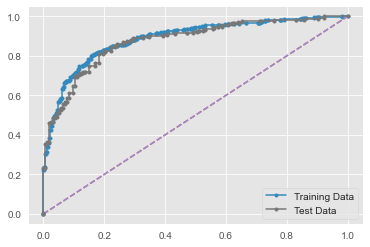

In [536]:
#AUC and ROC for the training data of  Naïve Bayes Model
pred_prob_train1 = NB.predict_proba(X_train)
pred_prob_test1 = NB.predict_proba(X_test)
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train1[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test1[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [537]:
#Getting model score on train and Test data
knn_score = knn.score(X_train, y_train)
print('Accuracy of KNeighbors Classifier on train set:{:.2f}'.format(NB.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test  set:{:.2f}'.format(NB.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on train set:0.84
Accuracy of KNeighbors Classifier on test  set:0.82


##### Validness of Model - Naïve Bayes
1.The Train and test results are very close to each other with difference of less tha 2.5% ,\
this can be considered as good case of classification.\
2.The accuracy score is also pretty good at 84% and 82% on test data.\
3.The variation in precision are minimum while there is slight variation in Recall and F1 score on train and test but seems consistent for both train and test set.\
4.In AUC score for both train(89%) and test data(88%) are close to each other also.\
5.In confusion matrix the the True positives are 54& and True Negatives are 24% whereas 8% are predict as positive and 9% are predicted as Negative which is not in actual.\
6.Hence there is No case of over fitting or Under fitting of data.\
7.The model would be stable and will perform good.\
8.As per this model can predict with 82% of accuracy that Labour party will get the edge over conservatives.


##### 1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

### Tuning of Models :Hyper-Parameters Tuning

The machine learning models are like a vote. There are some default parameter values for this vote, which we can tune or change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning

So based on the above given acuracy result  will performance (Grid search as instructed)


Logistic Regression

LDA

KNN

Gradient boost Classifier

adaaBoost Classifier

Parameters

Just a quick summary of the parameters that we will be listing here for completeness,

n_jobs : Number of cores used for the training process. If set to -1, all cores are used.

n_estimators : Number of classification trees in learning model ( set to 10 per default)

max_depth : Maximum depth of tree, or how much a node should be expanded. if set to too high a number would run the risk of overfitting as one would be growing the tree too deep.

verbose : Controls whether want to output any text during the process. A value of 0 suppresses all text while a value of 3 outputs the tree learning process at every iteration.


####  1.Tuning of Logistic Regression Models by Grid search
Grid search is best described as exhuastive guess and check. \
We have a problem: In our case which the data is not too much (1517 rows) we use different range of "C" to reduce the "Overfitting". A high C means "Trust this training data a lot", while a low value says "This data may not be fully representative of the real world data.

find the hyperparameters that result in the best cross validation score, and a set of values to try in the hyperparameter grid - the domain. The grid search method for finding the answer is to try all combinations of values in the domain and hope that the best combination is in the grid (in reality, we will never know if we found the best settings unless we have an infinite hyperparameter grid which would then require an infinite amount of time to run).

Grid search suffers from one limiting problem: it is extremely computationally expensive because we have to perform cross validation with every single combination of hyperparameters in the grid! Let's see how many total hyperparameter settings there are in our simple little grid we developed.

Application: \
If we run this on the entire dataset take these functions and put them in a script. However, I would advise against using grid search unless we have a very small hyperparameter grid because this is such as exhaustive method.

##### LR param grid choosing criteria:
1.Logistic Regression requires two parameters 'C' and 'penalty' to be optimised by GridSearchCV. So we have set these two parameters as a list of values form which GridSearchCV will select the best value of parameter.\
2.Principal Component Analysis requires a parameter 'n_components' to be optimised. 'n_components' signifies the number of components to keep after reducing the dimension.

In [479]:
n_components = list(range(1,X.shape[1]+1,1))
C = np.logspace(-4, 4, 20)
penalty = ['l1', 'l2']
param_grid = [    
    {'penalty' : ['l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter' : [100, 1000,2500, 5000]}]

In [480]:
#from sklearn.model_selection import RepeatedStratifiedKFold
# defining model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
clf = GridSearchCV(lr, param_grid = param_grid, cv = cv, n_jobs=-1);  

In [481]:
# Fitting best Cv on train data
best_clf = clf.fit(X_train,y_train)

In [482]:
#Let's find the best estimator and params
best_clf.best_estimator_
best_clf.best_params_

{'C': 0.08858667904100823, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag'}

In [483]:
#Applying the best parameters on test data
clf_lr = LogisticRegression(penalty = 'l2', C =0.088586679,solver = 'sag', max_iter= 1000)
test_clf = clf_lr.fit(X_test,y_test)

In [538]:
# Deriving Accuracy Score,Classification report confusion Matrix & Statndard Deviation of Training data
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.2f}\n'.format(accuracy_score(y_train,clf_lr.predict(X_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,clf_lr.predict(X_train))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,clf_lr.predict(X_train))))
res = cross_val_score(NB, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.2f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.63      0.69       307
           1       0.86      0.92      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061


Confusion Matrix:
[[194 113]
 [ 63 691]]

Average Accuracy:	0.83

Standard Deviation:	0.0349


In [484]:
# Deriving Accuracy Score,Classification report & confusion Matrix on Tune model
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,clf_lr.predict(X_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,clf_lr.predict(X_test))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,clf_lr.predict(X_test))))

TEST RESULTS:

Accuracy Score: 0.8421

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       153
           1       0.86      0.90      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.81      0.82       456
weighted avg       0.84      0.84      0.84       456


Confusion Matrix:
[[110  43]
 [ 29 274]]



AUC for the Training Data: 0.890
AUC for the Test Data: 0.880


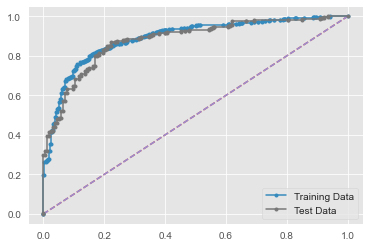

In [542]:
#AUC and ROC for the training data of Logistic Regression(GS) Model
pred_prob_train1 = clf_lr.predict_proba(X_train)
pred_prob_test1 = clf_lr.predict_proba(X_test)
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train1[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test1[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [543]:
#Getting Tuned model score on train and Test data model LR
print('Accuracy of logistic regression classifier on train set: {:.2f}'
      .format(clf_lr.score(X_train,y_train)))

print('Accuracy of logistic regression classifier on test set: {:.2f}'
      .format(clf_lr.score(X_test,y_test)))

Accuracy of logistic regression classifier on train set: 0.83
Accuracy of logistic regression classifier on test set: 0.83


##### Validness of Model : Logistc Regression Gridsearch
1.After the applying of gridsearch model the test accuracy has been gone up from 83% to 84% on test data.\
2.The variation in precision and slight variation in Recall and F1 score but seems consistant for both train and test set.\
3.In AUC score are 89% on train data while 88% on test data.\
4.In confusion matrix classification ,True positives are 60 % and True Negatives are 23% whereas 8% are predict as positive and 14% are predict as Negative which is not in actual.\
5.Hence there is No case of over fitting or Under fitting of data.\
6.The model would be stable and will perform good.\
7.As per this model the Labour party will get the edge over conservatives by accuracy of 83%.\
8.This model would be also stable and good for prediction.

##### 2.Tuning of Model LDA by Gridsearch

In [486]:
from sklearn.datasets import make_classification
# define model
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
ldg = LinearDiscriminantAnalysis(solver='lsqr')
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['shrinkage'] =(0, 1, 0.01)
# define search
search = GridSearchCV(ldg, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.893
Config: {'shrinkage': 0}


In [487]:
#Applying the best parameters on test data
clf_lda =  LinearDiscriminantAnalysis(solver='svd')
test_clf = clf_lda.fit(X_test,y_test)

In [544]:
# Deriving Accuracy Score,Classification report confusion Matrix & Statndard Deviation of Training data
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.2f}\n'.format(accuracy_score(y_train,clf_lda.predict(X_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,clf_lda.predict(X_train))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,clf_lda.predict(X_train))))
res = cross_val_score(NB, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.2f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061


Confusion Matrix:
[[200 107]
 [ 69 685]]

Average Accuracy:	0.83

Standard Deviation:	0.0349


In [545]:
# Deriving Accuracy Score,Classification report & confusion Matrix on Tune model KNN
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.2f}\n'.format(accuracy_score(y_test,clf_lda.predict(X_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,clf_lda.predict(X_test))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,clf_lda.predict(X_test))))

TEST RESULTS:

Accuracy Score: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456


Confusion Matrix:
[[111  42]
 [ 34 269]]



AUC for the Training Data: 0.889
AUC for the Test Data: 0.888


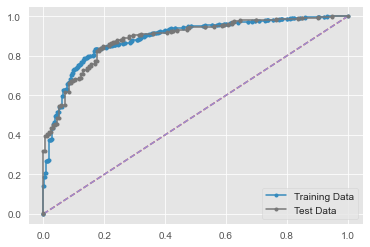

In [546]:
#AUC and ROC for the training data of LDA (GS)
pred_prob_train1 = clf_lda.predict_proba(X_train)
pred_prob_test1 = clf_lda.predict_proba(X_test)
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train1[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test1[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [621]:
#Getting Tuned model score on train and Test data model LR
print('Accuracy of Linear Discriminant(GS) classifier on train set: {:.2f}'
      .format(clf_lda.score(X_train,y_train)))

print('Accuracy of Linear Discriminant(GS) classifier on test set: {:.2f}'
      .format(clf_lda.score(X_test,y_test)))

Accuracy of Linear Discriminant(GS) classifier on train set: 0.83
Accuracy of Linear Discriminant(GS) classifier on test set: 0.83


##### Validness of Model : LDA Gridsearch
1.The accuracy score is also pretty good at 83% for train and test both.\
2.The variation in precision and slight variation in Recall and F1 score but seems consistant for both train and test set. \
3.In AUC score is almost 89% for both train and test data.\
4.In confusion matrix classification ,True positives are 60 % and True Negatives are 23% whereas 8% are predict as positive and   14% are predict as Negative which is not in actual.\
5.Hence there is No case of over fitting or Under fitting of data.\
6.The model would be stable and will perform good.\
7.As per this model the Labour party will get the edge over conservatives by accuracy of 83%.\
8.This model would be also stable and good for prediction.

##### 3.Tuning of Model KNN by Gridsearch

##### Logic to Choose the Hyperparameter: KNN
The most important hyperparameter for KNN is the number of neighbors (n_neighbors).

Test values between at least 1 and 15, perhaps just the odd numbers.
n_neighbors in [1 to 15]
It may also be interesting to test different distance metrics (metric) for choosing the composition of the neighborhood.

metric in [‘euclidean’, ‘manhattan’, ‘minkowski’]

It may also be interesting to test the contribution of members of the neighborhood via different weightings (weights).

weights in [‘uniform’, ‘distance’]

In [493]:
#Tuning of Model KNN by Gridsearch
from sklearn.model_selection import RepeatedStratifiedKFold
# defining the parameter values that has to be searched
n_neighbors = range(1, 15, 2)
weights = ['uniform', 'distance']
metric =  ['euclidean', 'manhattan', 'minkowski']

# define grid search
param_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# instantiate the grid
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

 # fit the grid with data
grid_result = grid_search.fit(X, y)

 # examine the best model
    
print('GridSearch best score', grid_search.best_score_)
print('GridSearch best params', grid_search.best_params_)
print('GridSearch best estimator', grid_search.best_estimator_)

GridSearch best score 0.9440000000000002
GridSearch best params {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
GridSearch best estimator KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=7,
                     weights='distance')


In [494]:
#Applying the best parameters on test data
clf_knn =KNeighborsClassifier(n_neighbors=7,metric='euclidean',weights='distance',algorithm='brute')

In [495]:
 # train a KNeighborsClassifier model on the training set
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=7,
                     weights='distance')

In [496]:
# make class predictions for the testing set
y_predict= clf_knn.predict(X_test)

In [598]:
# Deriving Accuracy Score,Classification report confusion Matrix & Statndard Deviation of Training data
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.2f}\n'.format(accuracy_score(y_train,clf_knn.predict(X_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,clf_knn.predict(X_train))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,clf_knn.predict(X_train))))
res = cross_val_score(NB, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.2f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061


Confusion Matrix:
[[307   0]
 [  0 754]]

Average Accuracy:	0.83

Standard Deviation:	0.0349


In [553]:
# Deriving Accuracy Score,Classification report & confusion Matrix on Tune model KNN
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.2f}\n'.format(accuracy_score(y_test,clf_knn.predict(X_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,clf_knn.predict(X_test))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,clf_knn.predict(X_test))))

TEST RESULTS:

Accuracy Score: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       153
           1       0.84      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.81      0.82      0.81       456


Confusion Matrix:
[[ 99  54]
 [ 29 274]]



AUC for the Training Data: 1.000
AUC for the Test Data: 0.868


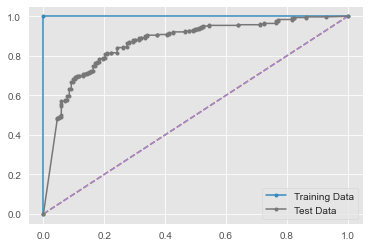

In [498]:
#AUC and ROC for the training data of KNN (GS)
pred_prob_train1 = clf_knn.predict_proba(X_train)
pred_prob_test1 = clf_knn.predict_proba(X_test)
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train1[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test1[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [623]:
#Getting  Tuned model score on train and Test data model KNN
print('Accuracy of KNeighbors(GS) classifier on train set: {:.2f}'
      .format(clf_knn.score(X_train,y_train)))

print('Accuracy of KNeighbors(GS) classifier on test set: {:.2f}'
      .format(clf_knn.score(X_test,y_test)))

Accuracy of KNeighbors(GS) classifier on train set: 1.00
Accuracy of KNeighbors(GS) classifier on test set: 0.82


##### Validness of Model - KNN Gridsearch
1.The Train and test results are very far to each other with difference of more than 17%,
this cannot be considered as good for classification classification.\
2.Large variation in all parameters of scores.\
3.Although The model accuracy score is also pretty good at 82% on test and 100% on train.\
4.Hence the case can be considered as case of OVER fitting .\
5.It would be advisable to DROP this model although the Scaling is not done .

#### 4.Tuning of Model Naive Bayes by Gridsearch

Naive Bayes doesn't have any hyperparameters to tune

In [500]:
from sklearn.preprocessing import PowerTransformer
clf_nb = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
clf_NB = GridSearchCV(estimator=clf_nb, 
                 param_grid=params_NB, 
                 cv=cv,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
clf_NB.fit(X_train, y_train)
Data_transformed = PowerTransformer().fit_transform(X_test)
clf_NB.fit(Data_transformed, y_test);
clf_NB.best_params_

Fitting 30 folds for each of 100 candidates, totalling 3000 fits
Fitting 30 folds for each of 100 candidates, totalling 3000 fits


{'var_smoothing': 0.657933224657568}

In [567]:
results_NB = pd.DataFrame(clf_NB.cv_results_['params'])
results_NB['test_score'] = clf_NB.cv_results_['mean_test_score']

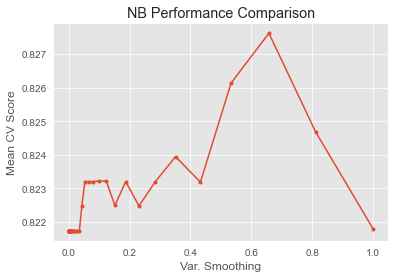

In [568]:
# Plottingbthe var smoothing
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [627]:
# Deriving Accuracy Score,Classification report confusion Matrix & Statndard Deviation of Training data
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.2f}\n'.format(accuracy_score(y_train,clf_NB.predict(X_train))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,clf_NB.predict(X_train))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,clf_NB.predict(X_train))))
res = cross_val_score(NB, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.2f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 0.71

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       307
           1       0.71      1.00      0.83       754

    accuracy                           0.71      1061
   macro avg       0.36      0.50      0.42      1061
weighted avg       0.51      0.71      0.59      1061


Confusion Matrix:
[[  0 307]
 [  0 754]]

Average Accuracy:	0.83

Standard Deviation:	0.0349


In [570]:
# Deriving Accuracy Score,Classification report & confusion Matrix on Tune model KNN
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.2f}\n'.format(accuracy_score(y_test,clf_NB.predict(X_test))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,clf_NB.predict(X_test))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,clf_NB.predict(X_test))))

TEST RESULTS:

Accuracy Score: 0.66

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       153
           1       0.66      1.00      0.80       303

    accuracy                           0.66       456
   macro avg       0.33      0.50      0.40       456
weighted avg       0.44      0.66      0.53       456


Confusion Matrix:
[[  0 153]
 [  0 303]]



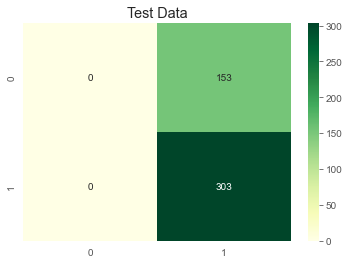

In [571]:
# Plotting confusion Matrix
sns.heatmap((metrics.confusion_matrix(y_test,clf_NB.predict(X_test))),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data');

AUC for the Training Data: 0.428
AUC for the Test Data: 0.414


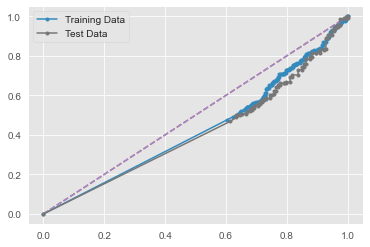

In [624]:
#AUC and ROC for the training data of  Naïve Bayes Model(GS)
pred_prob_train1 = clf_NB.predict_proba(X_train)
pred_prob_test1 = clf_NB.predict_proba(X_test)
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train1[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test1[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [628]:
#Getting  Tuned model score on train and Test data model Gausian NB
print('Accuracy of  Naïve Bayes Model(GS) classifier on train set: {:.2f}'
      .format(clf_NB.score(X_train,y_train)))

print('Accuracy of  Naïve Bayes Model(GS) classifier on test set: {:.2f}'
      .format(clf_NB.score(X_test,y_test)))

Accuracy of  Naïve Bayes Model(GS) classifier on train set: 0.71
Accuracy of  Naïve Bayes Model(GS) classifier on test set: 0.66


##### Validness of Model - Naïve Bayes
1.The Train and test results are very close to each other with difference of almost 10% ,\
2.The accuracy score is pretty low to 71% and 66% on test data.\
3.The variation in precision are minimum while there is slight variation in Recall and F1 score on train and test but seems consistent for both train and test set.
4.In AUC score for train(42%) and test data(41%) which is less than of 50%. \
5.In confusion matrix the the  all are classified as True positives and predicted positive No data are predict either Negative .\
6.The model would be NOT stable and better to drop. 


### Bagging
Bagging performs best with algorithms that have high variance. A popular example are decision trees, often constructed without pruning.

BaggingClassifier:

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

Bagging is a special case of the model averaging approach, in case of regression problem we take mean of the output and in case of classification we take the majority vote.\

This algorithm encompasses several works from the literature. When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting. If samples are drawn with replacement, then the method is known as Bagging. When random subsets of the dataset are drawn as random subsets of the features, then the method is known as Random Subspaces. Finally, when base estimators are built on subsets of both samples and features, then the method is known as Random Patches.


In [574]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n {clf_report}") 

    print("TESTING RESULTS: \n===============================") 
    
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [575]:
from sklearn.ensemble import BaggingClassifier

rfc_clf = RandomForestClassifier(random_state=1, n_estimators=1000)
rfc_clf.fit(X_train, y_train)
evaluate(rfc_clf, X_train, X_test, y_train, y_test)


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[307   0]
 [  0 754]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   307.00 754.00      1.00    1061.00       1061.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[104  49]
 [ 26 277]]
ACCURACY SCORE:
0.8355
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.80   0.85      0.84       0.82          0.83
recall      0.68   0.91      0.84       0.80          0.84
f1-score    0.73   0.88      0.84       0.81          0.83
support   153.00 303.00      0.84     456.00        456.00


AUC for the Training Data: 1.000
AUC for the Test Data: 0.896


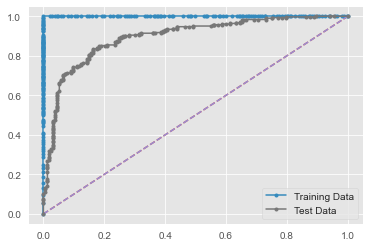

In [580]:
#AUC and ROC for the training data of Random Forest
pred_prob_train1 = rfc_clf.predict_proba(X_train)
pred_prob_test1 = rfc_clf.predict_proba(X_test)
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train1[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test1[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [581]:
#Getting model score on train and Test data of Bagging
print('Accuracy of Bagging(Random forest) Classifier on train set:{:.2f}'.format(rfc_clf.score(X_train, y_train)))
print('Accuracy of Bagging(Random forest on test  set:{:.2f}'.format(rfc_clf.score(X_test, y_test)))

Accuracy of Bagging(Random forest) Classifier on train set:1.00
Accuracy of Bagging(Random forest on test  set:0.84


##### Validness of Model - Random Forest(Bagging)
1.The Train and test results are very far to each other with difference of more than 17%,\
this cannot be considered as good for classification.\
2.Large variation in all parameters of scores. \
3.Although The model accuracy score is also pretty good at 82% on test and 100% on train.\
4.Hence the case can be considered as case of OVER fitting .\
5.It would be advisable to DROP this model although the Scaling is not done .

### Boosting
1.Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.\
2.In case of boosting, machine learning models are used one after the other and the predictions made by first layer models are used as input to next layer models. The last layer of models will use the predictions from all previous layers to get the final predictions.\
3.So boosting enables each subsequent model to boost the performance of the previous one by overcomming or reducing the error of the previous model.\
4.Boosting is more helpful if we have biased base models.\
5.Boosting can be used to solve regression and classification problems.Here we have to solve the classification problem.


We can construct an AdaBoost model and GradientBoost model for classification using the AdaBoostClassifier and GradientBoost Classifier class.

AdaBoostClassifier:
An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay or or less attention to them in the construction of subsequent models.

GradientBoost Classifier:
Gradient Boosting Regression is an analytical technique that is designed to explore the relationship between two or more variables (X, and y). Its analytical output identifies important factors ( Xi ) impacting the dependent variable (y) and the nature of the relationship between each of these factors and the dependent variable.

The main differences, the Gradient Boosting is a generic algorithm to find approximate solutions to the additive modeling problem, while AdaBoost can be seen as a special case with a particular loss function. Hence, Gradient Boosting is much more flexible.


In [582]:
#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[209  98]
 [ 62 692]]
ACCURACY SCORE:
0.8492
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision   0.77   0.88      0.85       0.82          0.85
recall      0.68   0.92      0.85       0.80          0.85
f1-score    0.72   0.90      0.85       0.81          0.85
support   307.00 754.00      0.85    1061.00       1061.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[104  49]
 [ 37 266]]
ACCURACY SCORE:
0.8114
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.74   0.84      0.81       0.79          0.81
recall      0.68   0.88      0.81       0.78          0.81
f1-score    0.71   0.86      0.81       0.78          0.81
support   153.00 303.00      0.81     456.00        456.00


AUC for the Training Data: 0.909
AUC for the Test Data: 0.881


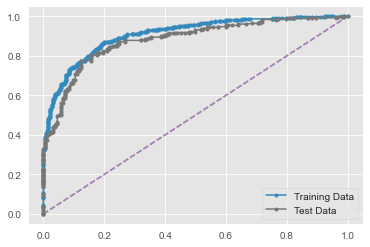

In [583]:
#AUC and ROC for the training data of AdaBoost Classifier
pred_prob_train1 = ada_boost_clf.predict_proba(X_train)
pred_prob_test1 = ada_boost_clf.predict_proba(X_test)
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train1[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test1[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [515]:
#Getting model score on train and Test data
print('Accuracy of Addaboost Classifier on train set: {:.2f}'
      .format(ada_boost_clf.score(X_train,y_train)))

print('Accuracy of Addaboostt Classifier  on test set: {:.2f}'
      .format(ada_boost_clf.score(X_test,y_test)))

Accuracy of Addaboost Classifier on train set: 0.85
Accuracy of Addaboostt Classifier  on test set: 0.81


##### Validness of Model - Adaboost classifier
1.The Train(85%) and test(81%) results are very close to each other with difference of 5% \
2.The accuracy score is also pretty good at 85% and 81% on train and test data respectively.\
3.The variation in precision ,Recall and F1 score are aprox 5% but seems consistent for both train and test set.\
4.In AUC score for both train(90%) and test data(88%) are close to each other also.\
5.In confusion matrix the  True positives are 58% and True Negatives are 23% whereas 10% are predict as positive and 8% are predict as Negative which is not in actual.\
6.Hence there is No case of over fitting or Under fitting of data.\
7.The model would be stable and will perform good.\
8.As per this model can predict with 81% of accuracy that Labour party will get the edge over conservatives


In [516]:
# Gradiantboost classifier
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 30,random_state=1)
gbcl.fit(X_train, y_train)
evaluate(gbcl, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[214  93]
 [ 49 705]]
ACCURACY SCORE:
0.8662
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision   0.81   0.88      0.87       0.85          0.86
recall      0.70   0.94      0.87       0.82          0.87
f1-score    0.75   0.91      0.87       0.83          0.86
support   307.00 754.00      0.87    1061.00       1061.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 99  54]
 [ 20 283]]
ACCURACY SCORE:
0.8377
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.83   0.84      0.84       0.84          0.84
recall      0.65   0.93      0.84       0.79          0.84
f1-score    0.73   0.88      0.84       0.81          0.83
support   153.00 303.00      0.84     456.00        456.00


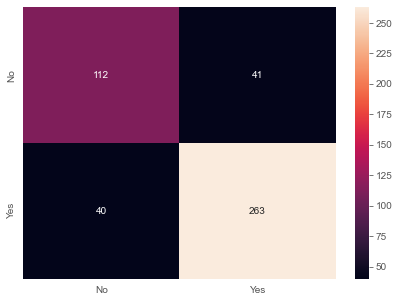

In [584]:
# Confusion Matrix
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

AUC for the Training Data: 0.925
AUC for the Test Data: 0.900


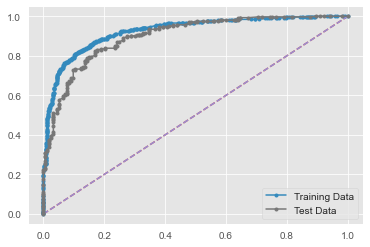

In [630]:
#AUC and ROC for the training data of AdaBoost Classifier
pred_prob_train1 = gbcl.predict_proba(X_train)
pred_prob_test1 = gbcl.predict_proba(X_test)
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train1[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test1[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [632]:
#Getting model score on train and Test data
print('Accuracy of Gradient boost Classifier on train set: {:.2f}'
      .format(gbcl.score(X_train,y_train)))

print('Accuracy of Gradient boost Classifier  on test set: {:.2f}'
      .format(gbcl.score(X_test,y_test)))

Accuracy of Gradient boost Classifier on train set: 0.87
Accuracy of Gradient boost Classifier  on test set: 0.84


##### Validness of Model -Gradiant boost Classifier
1.The Train and test results are very close to each other with difference of less than 4% \
2.The accuracy score is also pretty good at 87% and 84% on train and test data respectively.\
3.The variation in precision are minimum while there is slight variation in Recall and F1 score but seems consistent for both train and test set.\
4.In AUC score for both train(89%) and test data(87%) are close to each other also.\
5.In confusion matrix the True positives are 62% and True Negatives are 22% whereas 11% are predict as positive and 4% are predict as Negative which is not in actual.\
6.Hence there is No case of over fitting or Under fitting of data.\
7.The model would be stable and will perform good.\
8.As per this model can predict with 84% of accuracy that Labour party will get the edge over conservatives.

##### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

##### Accuracy, Confusion Matrix, Plot ROC curve 

Accuracy is a measure of the difference between the mean value or experimental value of a set of measurements and the true value. Therefore, Accuracy = Mean Value – True Value The smaller the difference between the mean value and true value, the larger is the accuracy

f1-score:\ 
f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

Precision:\
Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the NEGATIVE class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

Recall: \
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual POSITIVES.

Mathematically, recall can be given as the ratio of TP to (TP + FN)


Confusion matrix :\
A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error

ROC - AUC 
ROC Curve
Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

#### Compare ROC AUC curve and  Scores

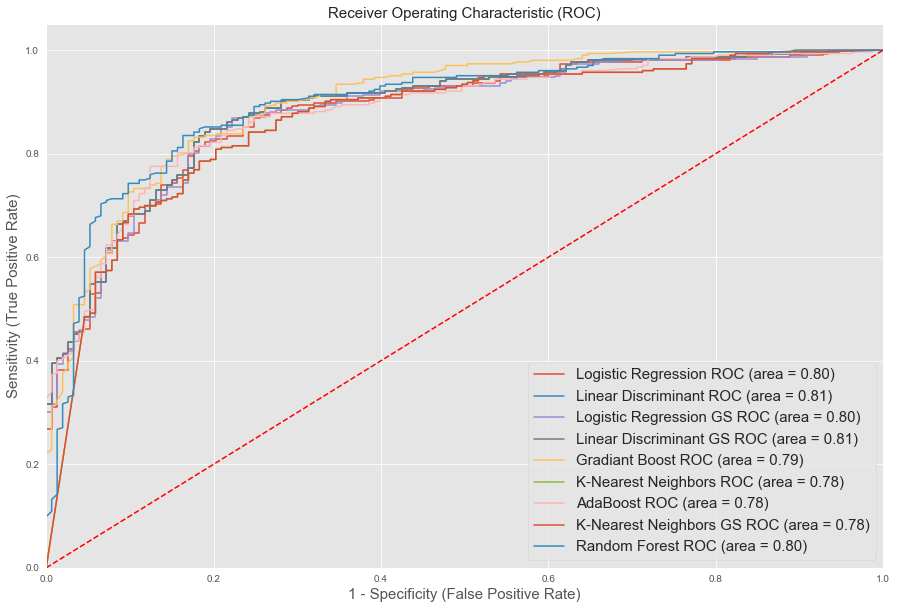

In [587]:
#Comparison of all Models  avrage ROC AUC Score and Curve
plt.figure(figsize=(15,10))
models = [
{
    'label': 'Logistic Regression',
    'model': lr,
},
{
    'label': 'Linear Discriminant',
    'model': lda,
},
{
    'label': 'Logistic Regression GS',
    'model': clf_lr,
},
{
    'label': 'Linear Discriminant GS',
    'model': clf_lda,
},
{
    'label': 'Gradiant Boost',
    'model': gbcl,
},
{
    'label': 'K-Nearest Neighbors',
    'model': knn,
},
{
    'label': 'AdaBoost',
    'model': ada_boost_clf,
},
{
    'label': 'K-Nearest Neighbors GS',
    'model': clf_knn,
},
{
    'label': 'Random Forest',
    'model': rfc_clf,

}
]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=15)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
plt.legend(loc="lower right", fontsize=15)
plt.savefig("roc.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

###### Discussions:AUC score
The scale of AUC over model stability\
0.5 = No discrimination\
0.5-0.7 = Poor discrimination\
0.7-0.8 = Acceptable discrimination\
0.8-0.9= Excellent discrimination\
0.9-1 = Outstanding discrimination \
By these standards, a model with an AUC score below 0.7 would be considered poor and anything higher would be considered acceptable or better.\
In our all models the AUC score are above 0.7 while highest in case of LDA GS at .81.


In [596]:
# Summary of Score for all Classifiers

from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
def classalgo_test(X_train,X_test,y_train,y_test): #classification
      
   
    lr=LogisticRegression()
    clf_lr=LogisticRegression()
    lda=LinearDiscriminantAnalysis()   
    clf_lda=LinearDiscriminantAnalysis()
    knn=KNeighborsClassifier()
    clf_knn=KNeighborsClassifier()
    NB=GaussianNB()
    clf_NB=GaussianNB()
    clf_rfc=RandomForestClassifier()
    gbcl=GradientBoostingClassifier()
    ada_boost_clf=GradientBoostingClassifier()
    
    
    algos = [lr,clf_lr,lda,clf_lda,knn,clf_knn,NB,clf_NB,rfc_clf,gbcl,ada_boost_clf]
    algo_names = ['LogisticRegression','LinearDiscriminantAnalysis','GaussianNB','KNeighborsClassifier','RandomForestClassifier','KNeighborsClassifier','GradientBoostingClassifier','AdaBoostClassifier','LinearDiscriminantAnalysisGS','LogisticRegressionGS','GaussianNBGS']
    accsc=[]
    precsc=[]
    fsc=[]
    rsc=[]
    
    result = pd.DataFrame(columns = ['Accuracy Score','Precision Score'],index = algo_names)
    
    for algo in algos:
    
        algo.fit(X_train,y_train)
        pred=algo.predict(X_test)
        accsc.append(accuracy_score(pred,y_test))
        precsc.append(precision_score(pred,y_test))
        rsc.append(recall_score(pred,y_test))
        fsc.append(f1_score(pred, y_test, average='micro'))
    
    result['Accuracy Score'] = accsc
    result['Precision Score'] = precsc
    result['Recall']=rsc
    result['F1 Score']= fsc
        
    return result.sort_values('Accuracy Score', ascending=False)

In [597]:
#Getting average Test Parameters Scores for individual model while plotting for all models
classalgo_test(X_train,X_test,y_train,y_test)

,Accuracy Score,Precision Score,Recall,F1 Score
GaussianNBGS,0.84,0.91,0.85,0.84
LinearDiscriminantAnalysisGS,0.84,0.91,0.85,0.84
LogisticRegressionGS,0.84,0.91,0.85,0.84
GaussianNB,0.83,0.89,0.86,0.83
KNeighborsClassifier,0.83,0.89,0.86,0.83
LogisticRegression,0.82,0.88,0.86,0.82
LinearDiscriminantAnalysis,0.82,0.88,0.86,0.82
RandomForestClassifier,0.82,0.91,0.84,0.82
KNeighborsClassifier,0.82,0.91,0.84,0.82
GradientBoostingClassifier,0.82,0.87,0.87,0.82


##### Model comparison Discussion and choosing best Model

All models have accuracy more than 80% on test data and AUC score also above the .70.In few models there are large variation among the train and test accuracy. One Model only predicting the positive results.
The Model those having more than 10% of variation in accuracy also showing the variation as other parameters too.
Among all the Three Model can be identify for classification of this case are:\
1.Logistic Regression \
2.Naïve Bayes Model\
3.Gradient Boosting Classifier\
Among these three the Best Model for the prediction in this problem statement is Gradient Boosting Classifier
because:\
1.The Train and test results are very close to each other with difference of less than 4%
2.The accuracy score is also pretty good at 87% and 84% on train and test data respectively.\
3.The variation in precision are minimum while there is slight variation in Recall and F1 score but seems consistent for both train and test set.\
4.In AUC score for both train(89%) and test data(87%) are close to each other also and support this model.\
5.In confusion matrix the True positives are 62% and True Negatives are 22% whereas 11% are predict as positive and 5% are predicted as Negative which is not in actual.\
Total Positive : 84%\
Total Negative: 16%\
AUc score and ROC_AUC curve also advocated to this model.\
Precision : 84 on test data while 88 on train data\
F1 Score: 88 on test and 91 on train data set.\
The Total Positive will help the news channels CNBE who wants to analyse recent elections on exit poll.\
6.As per Gradient Boosting Classifier model can predict with 84% of accuracy that Labour party will get the edge over conservatives.


In [599]:
# Gradiantboost classifier
gbcl = GradientBoostingClassifier(n_estimators = 30,random_state=1)
gbcl.fit(X_train, y_train)
evaluate(gbcl, X_train, X_test, y_train, y_test)


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[214  93]
 [ 49 705]]
ACCURACY SCORE:
0.8662
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision   0.81   0.88      0.87       0.85          0.86
recall      0.70   0.94      0.87       0.82          0.87
f1-score    0.75   0.91      0.87       0.83          0.86
support   307.00 754.00      0.87    1061.00       1061.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 99  54]
 [ 20 283]]
ACCURACY SCORE:
0.8377
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.83   0.84      0.84       0.84          0.84
recall      0.65   0.93      0.84       0.79          0.84
f1-score    0.73   0.88      0.84       0.81          0.83
support   153.00 303.00      0.84     456.00        456.00


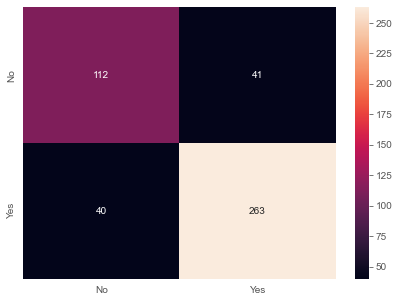

In [600]:
# Confusion Matrix
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

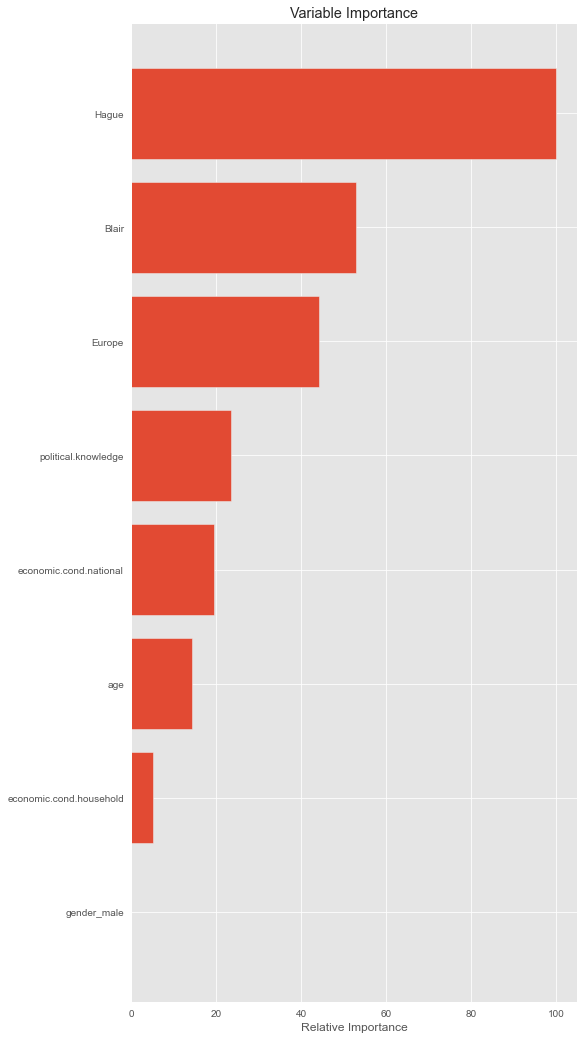

In [618]:
# Plot feature importance of Gradient Boosting Classification
feature_importance = gbcl.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

The Hague are most important feature followed by Blair and Europe. These Three factors may play the deciding role in win of Labour party. Whereas Gender not seems playing a large role in priority list. But person having Political knowledge has better importance than Economic national and age factor.

##### 1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

##### Recomendations:
After 1526 exit poll data analysis, its coming out that the Labour party is going to taste the win as per data and Modelling prediction with accuracy of almost 84%. Because:\
1.The population having political knowledge (especially class2) has high orientation followed by those population having NO political Knowledge towards Labour party.\
2.Population with attitudes toward European integration has high orientation for labour party rather than Conservatives where has the conservative party has also very high positive impact in this class.\
3.Leadership Impact of labour party leadership has great impression over population which will propagate to get the election win.\
4.Both Male and population are supporting the Labour party with open heart, while female population having more in population over man.\
5.All type economic condition of Household has large orientation towards Labour party to win.\
6.Labour party has to work upon the population who are having of Attitudes toward European integration. This factor seems strong for conservative party as well.\
7.Lower Ranking in Assessment of the Conservative leader with give top most impact on win of Labour party. The anti-incumbency can be seen or damage of Conservative leader my other means will giving edge to Labour party.\
8.Labour party will win by huge margin over conservative party the election as per given data set of exit poll
